# EDA

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import nltk
from nltk.tokenize import sent_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aryanahadinia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [66]:
data_df = pd.read_excel("../data/dataset.xlsx")
data_df = data_df.dropna()
data_df = data_df.reset_index(drop=True)
data_df = data_df.drop(columns=["Unnamed: 0"])
data_df.head()

,participant_id,collective,contrast,goal,goals2,list,metaphor,moral,question,story,...,final_text,overall_sentiment_all,positive_sentiment_all,negative_sentiment_all,neutra_sentiment_all,mixed_sentiment_all,targets,text_length_all,prolific_score,prolific_indicator_all
0,5e1cf0eb65b6d3071f489de9,0.35,1.07,0.43,0.32,6.96,0.94,2.36,0.01,0.46,...,Hello everyone. Thank you. Taking the time to ...,POSITIVE,0.9569,0.0007,0.0417,0.0007,HIGH,771.0,100.0,2
1,55d06fd334e9060012e5781c,0.30,0.67,0.30,0.20,2.83,0.71,0.22,0.01,0.60,...,"Hi, I am Kathy. I'd love to be considered for ...",NEUTRAL,0.1587,0.0055,0.8350,0.0009,MED,424.0,99.0,2
2,615586b009f801c3f2d4af8d,0.18,0.74,0.16,0.26,3.40,1.10,1.09,0.01,0.37,...,uh yeah I I think I would be the best candidat...,POSITIVE,0.8051,0.0164,0.1747,0.0039,MED,449.0,100.0,2
3,5847e60f73170700013697c6,0.14,2.14,0.27,0.12,3.05,0.49,0.46,0.00,1.09,...,Hello. Um I've of course a fair amount of expe...,POSITIVE,0.5761,0.1185,0.2484,0.0570,HIGH,611.0,100.0,2
4,6086a11397234e7f83e4e793,0.90,4.76,0.86,0.22,7.92,0.56,2.95,0.01,0.19,...,"Okay, so I would like to thank you for giving ...",POSITIVE,0.8515,0.0016,0.1456,0.0013,HIGH,611.0,100.0,2


## Target Variables

### Main Dataset

In [67]:
targets = [
    "hones16",
    "emoti16",
    "extra16",
    "agree16",
    "consc16",
    "openn16",
]

labels = [
    "Honesty",
    "Emotional Stability",
    "Extroversion",
    "Agreeableness",
    "Conscientiousness",
    "Openness",
]

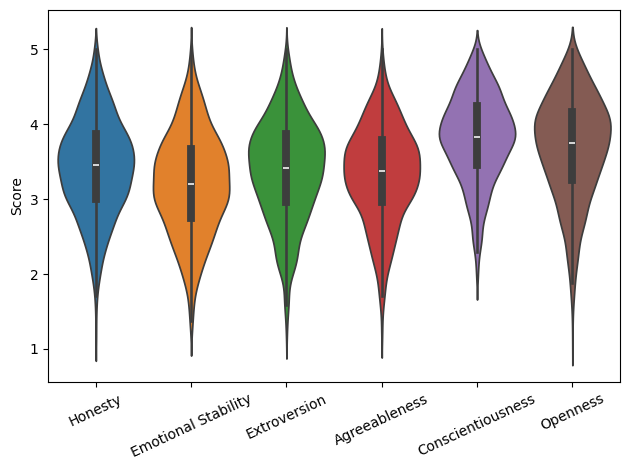

In [68]:
plt.figure()
sns.violinplot(data=data_df[targets])
plt.xticks(range(6), labels)
plt.xticks(rotation=25)
plt.ylabel("Score")
plt.tight_layout()
plt.savefig("eda_results/targets_violin.pdf", format="pdf")
plt.show()

## My Personality Dataset

In [69]:
my_personality_df = pd.read_csv(
    "../external_datasets/my_personality/my_personality.csv",
    encoding="ISO-8859-1",
)

my_personality_targets = ["sEXT", "sNEU", "sAGR", "sCON", "sOPN"]

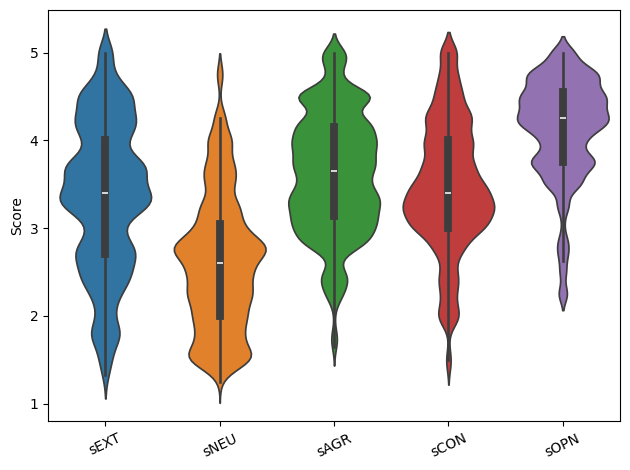

In [70]:
plt.figure()
sns.violinplot(data=my_personality_df[my_personality_targets])
plt.xticks(rotation=25)
plt.ylabel("Score")
plt.tight_layout()
plt.show()